To test if my prediction making pipline would work, I'm going to test it out in this notebook. 

There steps towards predicting are as follows:

1. import a lengthy string of sentences as text data
2. import TFIDF, NMF, and 4 models
3. Use spacy and regex to preprocess
4. Vectorize the string with tfidf.transform()
5. Topic model using NMF.transform()
6. 


In [58]:
import pandas as pd

In [59]:

text_examples = pd.read_pickle('text_examples.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'text_examples.pkl'

In [128]:
text = '''
I'm Jay, nice to see everyone! I was born and raised in Korea and am currently living in the Boston area. I have a bachelor's in biology from Rice University and a PhD in molecular genetics and neuroscience from MIT. My research was almost entirely experimental though, so I am quite new to things like coding, large datasets, quantitative modeling, etc... a bit intimidated honestly! But my preliminary forays into data and programming have been a blast and I hope to get the most out of Metis. Outside of work, I spend my time reading personal finance books/blogs, and occasionally dabbling in music production.
'''

# Import models and transformations

In [129]:
import pandas as pd
EI = pd.read_pickle('pickled_models/EI_Logistic Reg.pkl')
NS = pd.read_pickle('pickled_models/NS_Logistic Reg.pkl')
FT = pd.read_pickle('pickled_models/FT_Logistic Reg.pkl')
PJ = pd.read_pickle('pickled_models/PJ_Logistic Reg.pkl')

In [130]:
tfidf = pd.read_pickle('pickled_transformations/tfidf.pkl')
TopicModel = pd.read_pickle('pickled_transformations/NMF.pkl')

# SpaCy and Regex preprocessing

In [131]:
import spacy
import re
import string
import matplotlib.pyplot as plt
# Create our list of punctuation marks
punctuations = string.punctuation

# Load English tokenizer, tagger, parser, NER and word vectors
parser = spacy.load('en_core_web_sm')

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)
    
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    # return preprocessed list of tokens
    return ' '.join(mytokens)
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x.lower())

In [132]:
new_text = pd.Series(text).apply(spacy_tokenizer).map(alphanumeric).map(punc_lower)

# TF-IDF text

In [133]:
X_test_tfidf = tfidf.transform(pd.Series(new_text))

In [134]:
pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names())

,abandon,ability,able,abnormal,abortion,abroad,absence,absent,absolute,absolutely,...,youtube,yr,yrs,yup,zelda,zen,zero,zodiac,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling

In [135]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    """
    Takes in model and feature names and outputs 
    a list of string of the top words from each topic.
    """
    topics = []
    for ix, topic in enumerate(model.components_):
        topics.append(str(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))
    return topics

In [136]:
topics = display_topics(TopicModel, tfidf.get_feature_names(), 3)

In [137]:
topic_word = pd.DataFrame(TopicModel.components_.round(3),
             index =  topics,
             columns = tfidf.get_feature_names())

In [138]:
X_test_topic_array = TopicModel.transform(pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names()))

In [139]:
X_test_topics = pd.DataFrame(X_test_topic_array.round(5),
             columns = topics)

In [140]:
X_test_topics.T.columns

RangeIndex(start=0, stop=1, step=1)

In [168]:
 X_test_topics.T.sort_values(0).tail()[0]

like, feel, sound      0.00600
movie, book, watch     0.01348
school, high, year     0.01771
music, song, listen    0.02239
work, job, good        0.03068
Name: 0, dtype: float64

In [143]:
X_test_topics.T.sort_values(0, ascending=False).head()

,0
"work, job, good",0.03068
"music, song, listen",0.02239
"school, high, year",0.01771
"movie, book, watch",0.01348
"like, feel, sound",0.00600


In [170]:
X_test_topics.T.sort_values(0).tail().index

Index(['like, feel, sound', 'movie, book, watch', 'school, high, year',
       'music, song, listen', 'work, job, good'],
      dtype='object')

<BarContainer object of 5 artists>

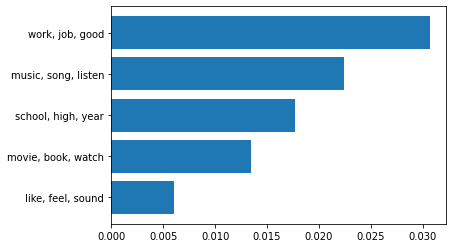

In [172]:
plt.barh(X_test_topics.T.sort_values(0).tail().index, X_test_topics.T.sort_values(0).tail()[0])

In [124]:
pred_list = []
if EI.predict(X_test_topics) == 1:
    pred_list.append('E')
else:
    pred_list.append('I')
if NS.predict(X_test_topics) == 1:
    pred_list.append('N')
else:
    pred_list.append('S')
if FT.predict(X_test_topics) == 1:
    pred_list.append('F')
else:
    pred_list.append('T')
if PJ.predict(X_test_topics) == 1:
    prediction.append('P')
else:
    prediction.append('J')
prediction = ''.join(pred_list)

In [125]:
import time
print(time())

TypeError: 'module' object is not callable

In [126]:
prediction 

'ISTP'

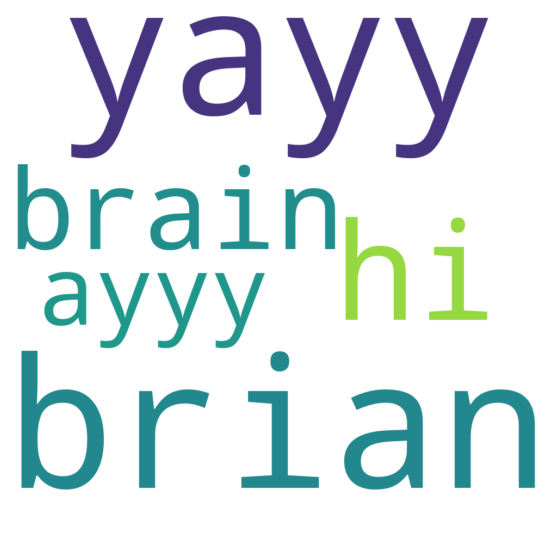

In [75]:
# Generate WordCloud
from wordcloud import WordCloud 

# Generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 20).generate(new_text[0])

# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Appendix

Writing styles. 

In [97]:
text = pd.DataFrame([text])

In [98]:
pd.Series(text_examples[0])

0    What has been the most life-changing experienc...
dtype: object

In [33]:
pd.Series(text)

0    What has been the most life-changing experienc...
dtype: object

In [35]:
text1 = 'I am Brian'

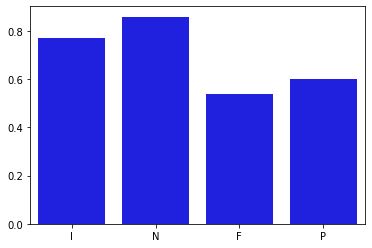

In [181]:
sns.barplot(['I','N','F','P'],[.77,.86,.54,.60], color='blue')

In [189]:
classifier = ['majority class']*4 + ['model accuracy']*4

In [214]:
letter = ['I vs E','N vs S','F vs T','P vs J','I vs E','N vs S','F vs T','P vs J']

In [215]:
val = [.77,.86,.54,.60,.85,.90,.84,.77]

AttributeError: 'list' object has no attribute 'savefig'

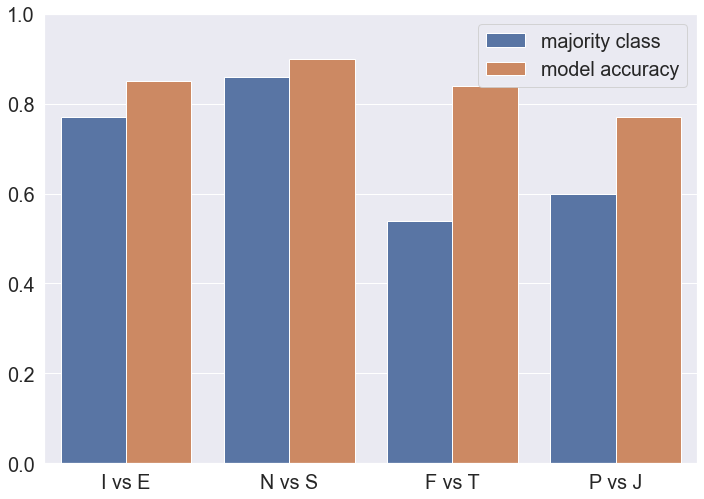

In [219]:

sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale = 1.8)
model_accuracy = sns.barplot(x=letter, y=val, hue=classifier).set(ylim=(0,1))
model_accuracy.savefig('model_accuracy.png')